In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import finance_functions as ff

In [2]:
# Read files
ind_rets = pd.read_csv('data/ind30_m_vw_rets.csv', 
                  header = 0, 
                  index_col=0,
                  parse_dates=True) / 100

# fixing the dates to month end periods
ind_rets.index = pd.to_datetime(ind_rets.index, format = '%Y%m').to_period('M') 

# fixing column names
ind_rets.columns = ind_rets.columns.str.strip()

# Number of firms included in each industry
ind_nfirms = pd.read_csv('data/ind30_m_nfirms.csv', 
                  header = 0, 
                  index_col=0,
                  parse_dates=True)

# fixing the dates to month end periods
ind_nfirms.index = pd.to_datetime(ind_nfirms.index, format = '%Y%m').to_period('M') 

# fixing column names
ind_nfirms.columns = ind_nfirms.columns.str.strip()

# Average industry size
ind_size = pd.read_csv('data/ind30_m_size.csv', 
                  header = 0, 
                  index_col=0,
                  parse_dates=True)
# fixing the dates to month end periods
ind_size.index = pd.to_datetime(ind_size.index, format = '%Y%m').to_period('M') 

# fixing column names
ind_size.columns = ind_size.columns.str.strip()

In [3]:
ind_rets

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


In [4]:
# Computing the market capitalization of different industries over time
ind_mktcap = ind_nfirms * ind_size

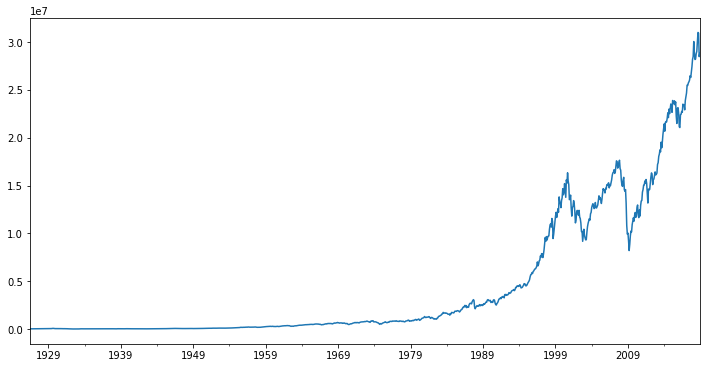

In [5]:
# Computing the fraction of market capitalization for each industry
total_mktcap = ind_mktcap.sum(axis='columns')
total_mktcap.plot(figsize=(12,6))

In [6]:
# Computing the weight of each industry in the total market
ind_capweight = ind_mktcap.divide(total_mktcap, axis='rows')

In [7]:
# Making sure that each row adds up to a 1 
ind_capweight.loc['1926'].sum(axis='columns')

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

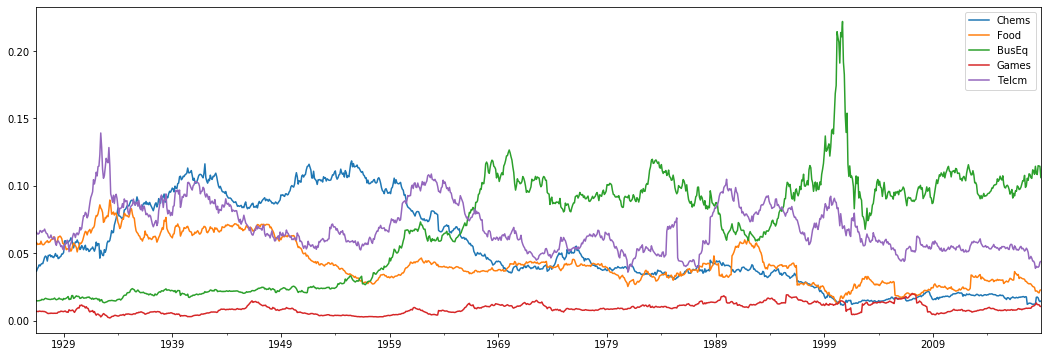

In [8]:
# Checking the capweight of a few industries
ind_capweight[['Chems', 'Food', 'BusEq', 'Games', 'Telcm']].plot(figsize=(18, 6))

In [9]:
# Computing the total market return
total_mkt_rets = (ind_capweight * ind_rets).sum(axis='columns')

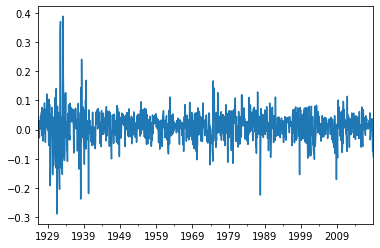

In [10]:
total_mkt_rets.plot()

In [11]:
# Computing the total market index (cumulative product of 1 + total market returns)
total_mkt_index = 1000 * (1 + total_mkt_rets).cumprod()

In [12]:
dollar = pd.read_csv('data/USD_purchasing_power.csv', 
                    header=0,
                    index_col=0,
                    parse_dates=True)
# fixing the dates to month end periods
dollar.index = pd.to_datetime(dollar.index, format = '%Y%m').to_period('M') 

dollar

,USD_pp_82_84_dollar100,USD_pp_191301_dollar100
Date,,
1913-01,1017.8,100.000000
1913-02,1021.4,100.353704
1913-03,1021.4,100.353704
1913-04,1017.8,100.000000
1913-05,1025.0,100.707408
...,...,...
2020-09,38.4,3.772843
2020-10,38.4,3.772843
2020-11,38.4,3.772843


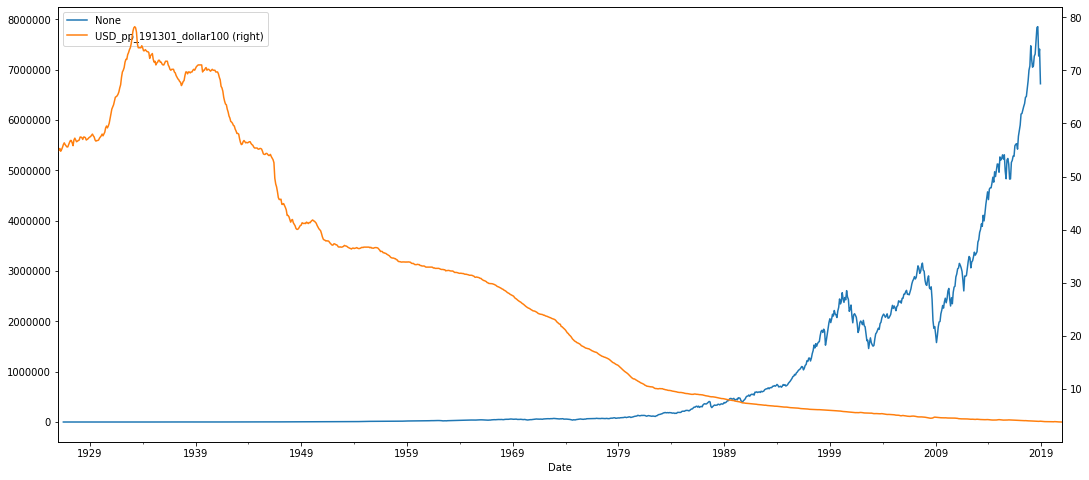

In [13]:
total_mkt_index.plot(legend=True)
dollar['1926':]['USD_pp_191301_dollar100'].plot(secondary_y=True, figsize=(18, 8), legend=True)

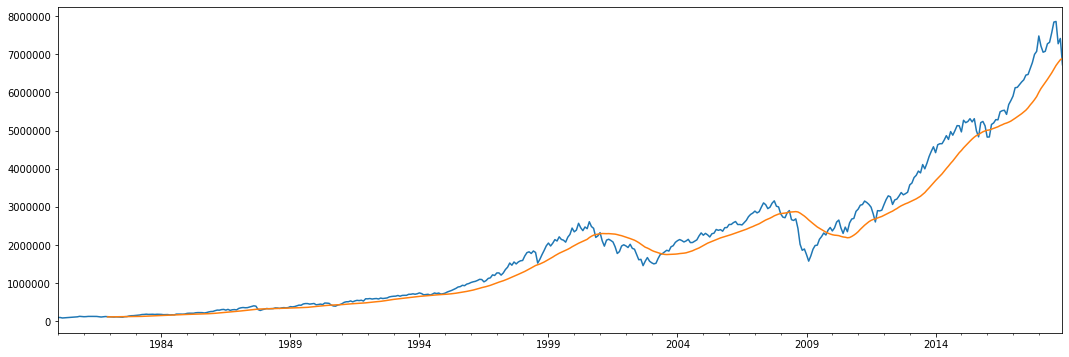

In [14]:
# Trailing 36 months index
total_mkt_index['1980':].plot(figsize=(18, 6))
total_mkt_index['1980':].rolling(window=24).mean().plot(figsize=(18, 6))

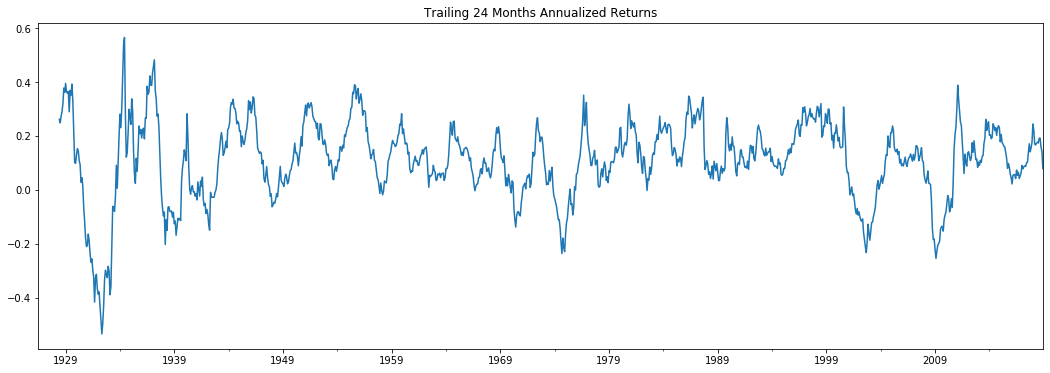

In [15]:
# Computing the trailing 36 months returns of the index (not the index itself as in the previous plot) 
# after compounding the returns over time
# here aggregate will run the annualized returns function over each rolling window of 36 months
tmi_tr24mo_rets = total_mkt_rets.rolling(window=24).aggregate(ff.annualized_return, periods_per_year=12)
tmi_tr24mo_rets.plot(figsize=(18, 6), title='Trailing 24 Months Annualized Returns')

### Rolling correlations

In [16]:
# Creating a correlation matrix for a rolling 36 month period between industry returns. 
# Here each date (e.g., 2018-12) has a rolling window of 36 months, so the correlation is being computed
# for each 36 months rolling window and since correlation output is a square matrix, each date has it's 
# own correlation matrix

ts_corr = ind_rets.rolling(window=24).corr()
ts_corr

Food      Beer     Smoke     Games     Books     Hshld  \
1926-07 Food        NaN       NaN       NaN       NaN       NaN       NaN   
        Beer        NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke       NaN       NaN       NaN       NaN       NaN       NaN   
        Games       NaN       NaN       NaN       NaN       NaN       NaN   
        Books       NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2018-12 Whlsl  0.656151  0.566036  0.288471  0.607231  0.746334  0.563157   
        Rtail  0.623795  0.440947  0.103152  0.722373  0.634451  0.350912   
        Meals  0.559697  0.581371  0.233552  0.283280  0.414630  0.410752   
        Fin    0.582878  0.479360  0.225228  0.512186  0.724732  0.386945   
        Other  0.532853  0.566574  0.271289  0.410983  0.482156  0.540574   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
1926-07 Food        NaN       NaN       NaN       NaN  ...       NaN   
        Beer        NaN       NaN       NaN       NaN  ...       NaN   
        Smoke       NaN       NaN       NaN       NaN  ...       NaN   
        Games       NaN       NaN       NaN       NaN  ...       NaN   
        Books       NaN       NaN       NaN       NaN  ...       NaN   
...                 ...       ...       ...       ...  ...       ...   
2018-12 Whlsl  0.719513  0.773011  0.742868  0.598688  ...  0.605795   
        Rtail  0.741675  0.706516  0.661013  0.650365  ...  0.580204   
        Meals  0.196734  0.454877  0.476220  0.447559  ...  0.297087   
        Fin    0.708186  0.818245  0.779036  0.547622  ...  0.440557   
        Other  0.530330  0.911525  0.692438  0.508434  ...  0.567529   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
1926-07 Food        NaN       NaN       NaN       NaN       NaN       NaN   
        Beer        NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke       NaN       NaN       NaN       NaN       NaN       NaN   
        Games       NaN       NaN       NaN       NaN       NaN       NaN   
        Books       NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2018-12 Whlsl  0.672152  0.507318  0.709745  0.855871  1.000000  0.806514   
        Rtail  0.777230  0.617421  0.646077  0.670644  0.806514  1.000000   
        Meals  0.492305  0.386562  0.627211  0.635749  0.581536  0.614834   
        Fin    0.676815  0.522873  0.753615  0.797133  0.827396  0.738404   
        Other  0.649630  0.524364  0.795753  0.790574  0.764607  0.721854   

                  Meals       Fin     Other  
1926-07 Food        NaN       NaN       NaN  
        Beer        NaN       NaN       NaN  
        Smoke       NaN       NaN       NaN  
        Games       NaN       NaN       NaN  
        Books       NaN       NaN       NaN  
...                 ...       ...       ...  
2018-12 Whlsl  0.581536  0.827396  0.764607  
        Rtail  0.614834  0.738404  0.721854  
        Meals  1.000000  0.476751  0.511615  
        Fin    0.476751  1.000000  0.828010  
        Other  0.511615  0.828010  1.000000  

[33300 rows x 30 columns]

In [17]:
# Assigning a name to the multiindex
ts_corr.index.names = ['date', 'industry']

In [18]:
# Since we want the mean of the all the correlation matrices we need to create the mean. 
# groupby(level='date') groups by each date and gets it ready for computing the mean via the lambda function
ind_tr24corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())
ind_tr24corr.to_frame('Industry Correlations')

,Industry Correlations
date,
1926-07,NaN
1926-08,NaN
1926-09,NaN
1926-10,NaN
1926-11,NaN
...,...
2018-08,0.313218
2018-09,0.312897
2018-10,0.367187


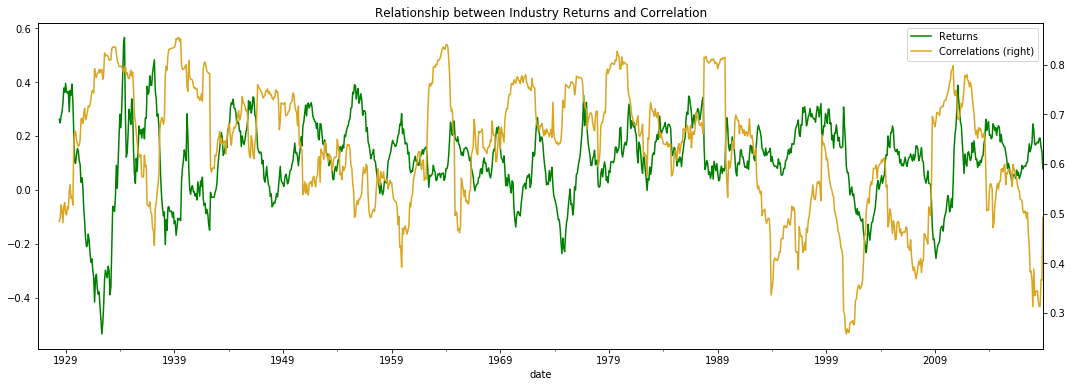

In [19]:
# Two plot commands in one cell means pandas will plot the both the plots in one panel
# Whichever plot command has secondary_y=True will the scale on right axis

tmi_tr24mo_rets.plot(legend=True, label='Returns', color='green', figsize=(18, 6), title='Relationship between Industry Returns and Correlation')
ind_tr24corr.plot(secondary_y=True, legend=True, label='Correlations', color='goldenrod')


In [20]:
tmi_tr24mo_rets.corr(ind_tr24corr)

-0.3049039273423492

### Implementing CPPI Strategies

In [25]:
# First defining the risky and safe assets
risky_rets = ind_rets['2000':]

In [26]:
# Since we have the returns from risky assets, we need a dataframe of returns on safe assets of the same size
# to go along in the algorithm. So we use the method reindex_like() to create a df of the same shape and then 
# we can stuff that empty df with the desired mimimum level of returns desired
# In the next step, we are stuffing each empty cell in safe_rets with an annual 5% return. Since the data is of
# monthly granularity, we divide the 5% by 12.
safe_rets = pd.DataFrame().reindex_like(risky_rets)
safe_rets[:] = 0.05/12

In [27]:
# Defining other parameters for CCPI 1
# Cushion = Asset value - Floor value
# Compute the allocation between safe and riskly assets ---> m * cushion
# Recompute asset value based on the returns
# range() gives you a sequence of numbers over which one can iterate

dates = risky_rets.index
n_steps = len(dates) # since the number of steps the algorithm needs to run is equal to the number of dates in the dataset

start = 1000 # start value of the portfolio
account_value = start
floor = 0.8 # percent of the asset value that must be protected
floor_value = start * floor
m = 3

account_history = pd.DataFrame().reindex_like(risky_rets)
cushion_history = pd.DataFrame().reindex_like(risky_rets)
risky_w_history = pd.DataFrame().reindex_like(risky_rets)

for step in range(n_steps):
    cushion = (account_value - floor_value) / account_value
    risky_w = m * cushion
    risky_w = np.minimum(risky_w, 1) # in case risky weight get more than 100% meaning one will have to get leverage
                                    # in order to invest and we don't want that so limiting it to the 1
    risky_w = np.maximum(risky_w, 0) # in case the risky_w could be negative, we want to avoid that so we limit it to
                                    # the maximum of 0 and risky weight so it never goes negative
    safe_w = 1 - risky_w
    risky_alloc = account_value * risky_w
    safe_alloc = account_value * safe_w
    # update the account value for this timestep
    account_value = risky_alloc * (1 + risky_rets.iloc[step]) + safe_alloc * (1 + safe_rets.iloc[step])
    # save the values so it can be used to stuff the empty dfs that we created before
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value
     

In [28]:
# Computing the account_value in case we didn't implement any CPPI strategy
risky_wealth = start * (1 + risky_rets).cumprod()
risky_wealth

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2000-01,917.100000,977.200000,913.800000,1022.900000,990.800000,934.900000,886.200000,1075.600000,906.700000,923.600000,...,959.600000,902.700000,993.600000,912.200000,904.100000,1089.900000,854.700000,926.100000,955.800000,958.800000
2000-02,853.911810,863.453920,877.156620,1004.794670,983.765320,826.732070,772.943640,1044.622720,840.601570,869.661760,...,925.150360,971.214930,1242.894240,808.026760,855.730650,1102.215870,821.110290,814.690170,874.652580,952.951320
2000-03,936.655864,864.576410,921.979323,1110.499069,1110.966176,708.840077,966.643316,1047.547664,942.902781,916.188664,...,995.184242,997.340612,1299.570217,875.577797,965.863185,1174.851896,939.021728,944.877659,1020.632096,951.426598
2000-04,900.126286,896.392822,956.922340,1134.930049,1029.421259,739.249316,1008.208979,1102.543916,907.732507,975.557690,...,916.564687,832.280740,1217.697294,866.033999,999.475223,1162.280981,886.436511,980.971986,977.255232,1029.348436
2000-05,1040.996049,1002.794650,1143.617888,1148.435716,968.376578,759.874372,957.395246,1145.984146,906.824775,943.559397,...,821.150303,758.041298,1075.835559,854.169333,963.194273,1184.713003,859.488841,939.673065,1026.704346,1084.006838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,5205.059654,4629.014147,21151.249252,7561.057867,1188.903572,2807.033380,10024.746509,4664.056912,5673.192937,5193.452918,...,1315.719310,2302.582720,1919.803813,4082.173485,6261.105500,4385.330586,4740.558649,7976.119784,3283.129665,1834.364592
2018-09,5188.403463,4637.809274,22287.071337,7554.252915,1162.628803,2837.068637,10155.068214,4756.871645,5510.372300,4862.110622,...,1338.612826,2294.063164,1913.468460,4069.926964,6326.847108,4320.427693,4769.476057,8176.320391,3219.765263,1855.643221
2018-10,5241.325178,4564.995669,24047.749973,6348.594150,1085.197725,2822.599587,9125.344297,4336.364191,4821.575762,3608.172292,...,1331.919762,2083.009353,1759.242902,3670.260136,5709.979515,3979.977991,4282.512551,8036.505312,3044.288056,1744.490192
2018-11,5383.889223,4829.308918,22020.524650,6307.328288,1120.466651,3004.375001,9035.003389,4610.422408,5060.725920,3713.530923,...,1365.750524,2109.880173,1670.401136,3971.955519,6062.285251,4106.541291,4350.604501,8531.554040,3132.267981,1805.198451


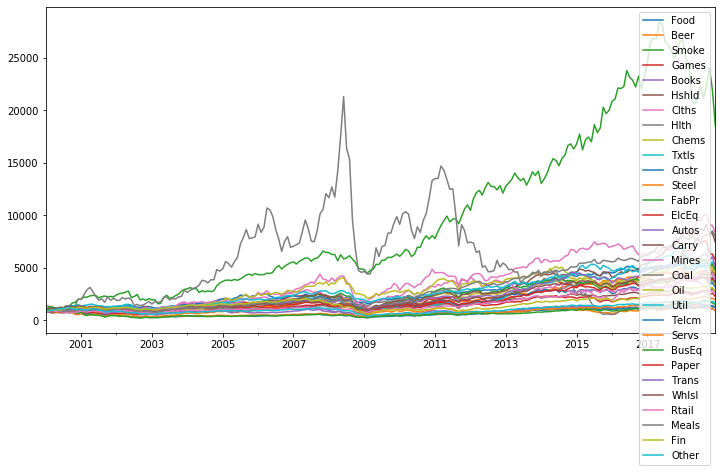

In [29]:
risky_wealth.plot(figsize=(12, 6))

In [30]:
risky_wealth.min()

Food     853.911810
Beer     863.453920
Smoke    877.156620
Games    604.689828
Books    310.845929
Hshld    708.840077
Clths    772.943640
Hlth     891.646025
Chems    770.723534
Txtls    473.849770
Cnstr    848.711000
Steel    340.327008
FabPr    775.819380
ElcEq    541.350179
Autos    256.744808
Carry    715.898286
Mines    758.143444
Coal     563.038964
Oil      930.874180
Util     980.725500
Telcm    282.258992
Servs    282.184399
BusEq    219.613299
Paper    759.897609
Trans    855.730650
Whlsl    840.298916
Rtail    675.235168
Meals    758.061518
Fin      586.817798
Other    396.630413
dtype: float64

In [31]:
risky_wealth.max()

Food      5432.619316
Beer      4892.773509
Smoke    28450.525432
Games     7827.738588
Books     1370.836213
Hshld     3004.375001
Clths    10155.068214
Hlth      4756.871645
Chems     5673.192937
Txtls     6988.342731
Cnstr     4503.207279
Steel     2042.767627
FabPr     6269.761533
ElcEq     2852.141278
Autos     1645.661197
Carry     9120.481764
Mines     4876.749200
Coal     21309.982172
Oil       5142.652464
Util      5556.653131
Telcm     1365.750524
Servs     2302.582720
BusEq     1919.803813
Paper     4528.233113
Trans     6326.847108
Whlsl     4385.330586
Rtail     4769.476057
Meals     8531.554040
Fin       3283.129665
Other     1900.655002
dtype: float64

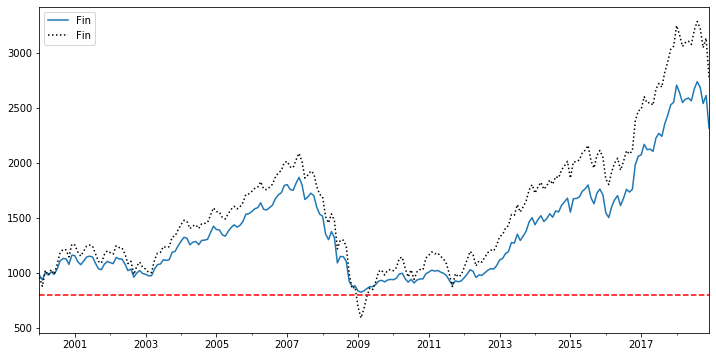

In [32]:
ind = 'Fin'
ax = account_history[ind].plot(figsize=(12, 6), legend=True)
risky_wealth[ind].plot(ax=ax, style='k:', legend=True)
ax.axhline(y=floor_value, color='r', linestyle='--')

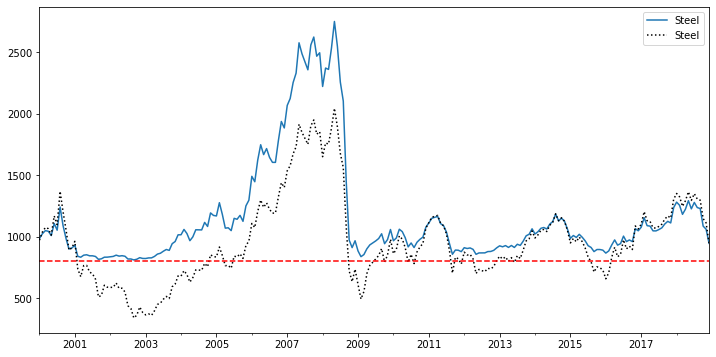

In [33]:
ind = 'Steel'
ax = account_history[ind].plot(figsize=(12, 6), legend=True)
risky_wealth[ind].plot(ax=ax, style='k:', legend=True)
ax.axhline(y=floor_value, color='r', linestyle='--')

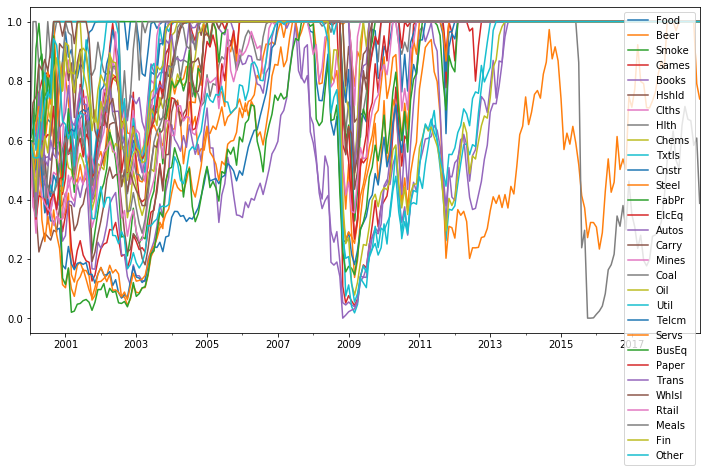

In [34]:
risky_w_history.plot(figsize=(12, 6))

In [35]:
ff.summary_stats(ind_rets)

,Annualized Returns,Annualized Volatility,Annualized Sharpe Ration,Max Drawdown,Occurred on,Skewness,Kurtosis,Historic VaR at 5%,Gaussian VaR,Cornish-Fisher VaR at 5%
Food,0.106649,0.163974,0.454770,-0.722186,1932-06,0.047090,9.685942,0.066675,0.068226,0.061207
Beer,0.120041,0.248922,0.351780,-0.885744,1932-05,1.767094,25.099855,0.090410,0.106206,0.033881
Smoke,0.122324,0.201206,0.446361,-0.598755,2000-02,0.003873,6.238037,0.080445,0.084150,0.080292
Games,0.091829,0.308881,0.194420,-0.958661,1933-03,0.640702,12.834406,0.122310,0.135309,0.100701
Books,0.079147,0.247850,0.192686,-0.915794,1941-12,0.505608,9.542575,0.105100,0.108740,0.088675
Hshld,0.093513,0.200962,0.307349,-0.8871,1932-06,0.378634,15.767173,0.081275,0.086223,0.064886
Clths,0.093518,0.210732,0.293105,-0.762776,1974-12,0.306152,7.564461,0.087020,0.090707,0.079707
Hlth,0.116723,0.192703,0.437783,-0.746865,1932-05,0.082986,9.655376,0.073610,0.080671,0.071884
Chems,0.107320,0.218022,0.344903,-0.859568,1932-06,0.307249,9.389386,0.078910,0.092979,0.079262
Txtls,0.083356,0.265996,0.194906,-0.875844,1932-06,0.946878,12.825371,0.098800,0.116688,0.079519


In [36]:
ff.var_cornish_fisher(ind_rets['2015':]).to_frame('Cornish-Fisher VaR').sort_values(by='Cornish-Fisher VaR', ascending=False)


,Cornish-Fisher VaR
Coal,0.244173
Txtls,0.126093
Mines,0.109020
Steel,0.107054
Oil,0.098700
Smoke,0.097791
ElcEq,0.090939
Books,0.088256
FabPr,0.087471
Games,0.085579


In [37]:
ff.run_cppi(ind_rets, drawdown=0.2)['Wealth'].pct_change().dropna()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-08,0.016540,0.143206,0.040000,0.004300,0.061060,-0.020307,-0.014060,0.026500,0.034000,0.049840,...,0.014020,0.013120,0.027340,-0.013280,0.030280,0.012967,-0.003500,0.000220,0.027760,0.041560
1926-09,0.007960,0.025120,0.008560,0.040480,-0.004940,0.005119,-0.001800,0.005140,0.032980,0.014860,...,0.015460,0.014500,0.002140,-0.030370,0.001300,-0.016943,0.002500,-0.002360,-0.006380,-0.022160
1926-10,-0.017360,-0.018860,0.007360,-0.027560,0.056721,-0.025016,0.001770,-0.002420,-0.027560,0.007000,...,0.000340,-0.011000,-0.005540,-0.023698,-0.014840,-0.027488,-0.012141,-0.023412,-0.029126,-0.045186
1926-11,0.036514,0.041492,0.028300,0.010001,-0.033800,-0.001414,0.011664,0.033219,0.028833,0.019660,...,0.010780,0.022680,0.022387,0.017960,0.010112,0.007472,0.038117,0.024395,0.012691,0.018605
1926-12,-0.002060,-0.023540,0.016300,0.013183,0.003945,0.013864,0.004578,0.001660,0.033220,0.039580,...,0.012940,0.038260,0.044440,-0.020727,0.022147,0.015087,0.004420,0.010001,0.015702,-0.009839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.000989,-0.009231,-0.016061,0.015993,-0.022256,0.014511,0.032560,0.027760,0.001060,0.011146,...,0.017053,0.032440,0.060580,-0.000302,0.018460,0.022544,0.055660,0.020794,0.015569,0.016802
2018-09,-0.000643,0.002180,0.016997,0.000629,-0.009016,0.007091,0.008800,0.012940,-0.016220,-0.015662,...,0.011146,-0.001220,-0.000980,-0.000108,0.007300,-0.007880,0.004660,0.015829,-0.010580,0.007623
2018-10,0.006733,-0.007302,0.027634,-0.086949,-0.028257,-0.001886,-0.059840,-0.052040,-0.068955,-0.057539,...,-0.002000,-0.053923,-0.047164,-0.045219,-0.057500,-0.044730,-0.060260,-0.009260,-0.030237,-0.033778
2018-11,0.016484,0.031332,-0.032254,-0.000368,0.013624,0.037938,-0.003046,0.030923,0.020386,0.004142,...,0.016130,0.007285,-0.022873,0.030732,0.029352,0.016203,0.008478,0.036634,0.015666,0.018547


In [ ]:
ff.run_cppi(ind_rets)['Wealth'].pct_change().dropna()

In [ ]:
btr = ff.run_cppi(ind_rets['2015':], drawdown=0.25)

In [ ]:
ff.summary_stats(btr['Wealth'].pct_change().dropna()).sort_values(by='Cornish-Fisher VaR at 5%', ascending=False)